In [5]:
import rasterio
import numpy as np
from pathlib import Path
from tqdm import tqdm
from get_image_paths import get_tif_files, get_list_time_band
import os

In [3]:
base_path = r"D:\work\DATA\DATA_TS4GPC\raw\UAV\CXZ-WN\CXZ-WN-2024"
# 获取并打印所有图像路径
tif_files = get_tif_files(base_path)
# 获取时间列表和波段列表
time_list,band_list = get_list_time_band(tif_files)

print("时间列表:", time_list)
print("波段列表:", band_list)

时间列表: ['240130', '240417', '240428', '240506', '240513', '240520']
波段列表: ['Blue', 'Green', 'NIR', 'Panch', 'Red', 'RedEdge']


In [4]:
input_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches"
output_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches_merged"

input_dir = Path(input_dir)
output_dir = Path(output_dir)
output_dir.mkdir(parents=True, exist_ok=True)

In [21]:
merge_list = []
for plot_id in range(240):
    plot_tif_name = []
    for date in time_list:
        date_tif_name = []
        for band in band_list:
            filename = f"CXZ-WN-{date}-{band}-{plot_id:03d}"
            date_tif_name.append(filename)
        plot_tif_name.append(date_tif_name)
    merge_list.append(plot_tif_name)

merge_list[0]

[['CXZ-WN-240130-Blue-000',
  'CXZ-WN-240130-Green-000',
  'CXZ-WN-240130-NIR-000',
  'CXZ-WN-240130-Panch-000',
  'CXZ-WN-240130-Red-000',
  'CXZ-WN-240130-RedEdge-000'],
 ['CXZ-WN-240417-Blue-000',
  'CXZ-WN-240417-Green-000',
  'CXZ-WN-240417-NIR-000',
  'CXZ-WN-240417-Panch-000',
  'CXZ-WN-240417-Red-000',
  'CXZ-WN-240417-RedEdge-000'],
 ['CXZ-WN-240428-Blue-000',
  'CXZ-WN-240428-Green-000',
  'CXZ-WN-240428-NIR-000',
  'CXZ-WN-240428-Panch-000',
  'CXZ-WN-240428-Red-000',
  'CXZ-WN-240428-RedEdge-000'],
 ['CXZ-WN-240506-Blue-000',
  'CXZ-WN-240506-Green-000',
  'CXZ-WN-240506-NIR-000',
  'CXZ-WN-240506-Panch-000',
  'CXZ-WN-240506-Red-000',
  'CXZ-WN-240506-RedEdge-000'],
 ['CXZ-WN-240513-Blue-000',
  'CXZ-WN-240513-Green-000',
  'CXZ-WN-240513-NIR-000',
  'CXZ-WN-240513-Panch-000',
  'CXZ-WN-240513-Red-000',
  'CXZ-WN-240513-RedEdge-000'],
 ['CXZ-WN-240520-Blue-000',
  'CXZ-WN-240520-Green-000',
  'CXZ-WN-240520-NIR-000',
  'CXZ-WN-240520-Panch-000',
  'CXZ-WN-240520-Red-000',


In [47]:
def get_patch_info(input_dir):
    """获取所有日期、波段和patch信息"""
    dates = set()
    bands = set()
    patch_counts = {}  # 存储每个日期-波段组合的patch数量
    
    for file_path in Path(input_dir).glob('*.tif'):
        # 解析文件名
        parts = file_path.stem.split('_')
        name_parts = parts[0].split('-')  # ['CXZ', 'WN', '240130', 'Blue', '000']
        date = name_parts[2]  # '240130'
        band = name_parts[3]  # 'Blue'
        plot_id = name_parts[4]  # '000'
        patch_num = parts[1]  # 'patch000'
        
        # 提取patch编号
        patch_idx = int(patch_num.replace('patch', ''))
        
        # 更新集合
        dates.add(date)
        bands.add(band)
        
        # 更新patch计数
        key = f"{date}-{band}-{plot_id}_patch{patch_idx}.tif"
        if key not in patch_counts:
            patch_counts[key] = set()
        patch_counts[key].add(patch_idx)
    
    # 打印统计信息
    print("\n数据集信息:")
    print(f"发现 {len(dates)} 个日期: {sorted(list(dates))}")
    print(f"发现 {len(bands)} 个波段: {sorted(list(bands))}")
    print("\n每个组合的patch数量:")
    for key, patches in sorted(patch_counts.items()):
        print(f"{key}: {len(patches)} patches (编号范围: 0-{max(patches)})")
    
    return sorted(list(dates)), sorted(list(bands)), patch_counts


# 获取数据集信息
dates, bands, patch_counts = get_patch_info(input_dir)

bands = ['Blue', 'Green', 'NIR', 'Red', 'RedEdge']


数据集信息:
发现 6 个日期: ['240130', '240417', '240428', '240506', '240513', '240520']
发现 6 个波段: ['Blue', 'Green', 'NIR', 'Panch', 'Red', 'RedEdge']

每个组合的patch数量:
240130-Blue-000_patch0.tif: 1 patches (编号范围: 0-0)
240130-Blue-000_patch1.tif: 1 patches (编号范围: 0-1)
240130-Blue-000_patch2.tif: 1 patches (编号范围: 0-2)
240130-Blue-000_patch3.tif: 1 patches (编号范围: 0-3)
240130-Blue-001_patch0.tif: 1 patches (编号范围: 0-0)
240130-Blue-001_patch1.tif: 1 patches (编号范围: 0-1)
240130-Blue-001_patch2.tif: 1 patches (编号范围: 0-2)
240130-Blue-001_patch3.tif: 1 patches (编号范围: 0-3)
240130-Blue-002_patch0.tif: 1 patches (编号范围: 0-0)
240130-Blue-002_patch1.tif: 1 patches (编号范围: 0-1)
240130-Blue-002_patch2.tif: 1 patches (编号范围: 0-2)
240130-Blue-002_patch3.tif: 1 patches (编号范围: 0-3)
240130-Blue-002_patch4.tif: 1 patches (编号范围: 0-4)
240130-Blue-003_patch0.tif: 1 patches (编号范围: 0-0)
240130-Blue-003_patch1.tif: 1 patches (编号范围: 0-1)
240130-Blue-003_patch2.tif: 1 patches (编号范围: 0-2)
240130-Blue-003_patch3.tif: 1 patches (编号范围:

In [50]:
def get_merge_combinations(input_dir):
    """获取所有需要合并的组合"""
    # 存储信息的字典
    dates = set()
    bands = set()
    sequences = set()
    patch_ranges = {}  # 存储每个组合的patch范围
    
    # 扫描所有文件获取信息
    for file_path in Path(input_dir).glob('*.tif'):
        parts = file_path.stem.split('_')
        name_parts = parts[0].split('-')  # ['CXZ', 'WN', '240130', 'Blue', '000']
        
        date = name_parts[2]      # '240130'
        band = name_parts[3]      # 'Blue'
        sequence = name_parts[4]  # '000'
        patch_num = int(parts[1].replace('patch', ''))  # 将'patch000'转换为0
        
        dates.add(date)
        bands.add(band)
        sequences.add(sequence)
        
        # 记录每个组合的patch范围
        key = (date, band, sequence)
        if key not in patch_ranges:
            patch_ranges[key] = set()
        patch_ranges[key].add(patch_num)
    
    # 生成合并列表
    merge_list = []
    dates = sorted(list(dates))
    # bands = sorted(list(bands))
    bands = ['Blue', 'Green', 'NIR', 'Red', 'RedEdge']
    sequences = sorted(list(sequences))
    
    # 对每个序列号和每个patch号都生成一个合并列表
    for sequence in sequences:
        sequence_list = []
        d = dates[0]
        b = bands[0]
        key = (d, b, sequence)
        if key in patch_ranges:
            # 获取该组合的所有patch编号
            patch_nums = sorted(list(patch_ranges[key]))
            # print(patch_nums)
            for patch_num in patch_nums:
                # print('patch_num:',patch_num)
                patch_list = []
                for date in dates:
                    date_list = []
                    for band in bands:
                        # 生成该组合的所有文件名
                        filenames = f"CXZ-WN-{date}-{band}-{sequence}_patch{patch_num:03d}.tif"
                        date_list.append(filenames)
                    patch_list.append(date_list)
                sequence_list.append(patch_list)
        if sequence_list:  # 只有当有完整的时间序列时才添加
            merge_list.append(sequence_list)
    
    # 打印示例
    if merge_list:
        print("\n第一个合并组合的前两个时间点示例:")
        for patch_list in merge_list[0][:2]:
            print(patch_list)
    
    return merge_list

input_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches"

merge_list = get_merge_combinations(input_dir)

# 可以将合并列表保存为JSON文件以便后续使用
import json
output_file = "merge_combinations.json"
with open(output_file, 'w') as f:
    json.dump(merge_list, f, indent=2)


第一个合并组合的前两个时间点示例:
[['CXZ-WN-240130-Blue-000_patch000.tif', 'CXZ-WN-240130-Green-000_patch000.tif', 'CXZ-WN-240130-NIR-000_patch000.tif', 'CXZ-WN-240130-Red-000_patch000.tif', 'CXZ-WN-240130-RedEdge-000_patch000.tif'], ['CXZ-WN-240417-Blue-000_patch000.tif', 'CXZ-WN-240417-Green-000_patch000.tif', 'CXZ-WN-240417-NIR-000_patch000.tif', 'CXZ-WN-240417-Red-000_patch000.tif', 'CXZ-WN-240417-RedEdge-000_patch000.tif'], ['CXZ-WN-240428-Blue-000_patch000.tif', 'CXZ-WN-240428-Green-000_patch000.tif', 'CXZ-WN-240428-NIR-000_patch000.tif', 'CXZ-WN-240428-Red-000_patch000.tif', 'CXZ-WN-240428-RedEdge-000_patch000.tif'], ['CXZ-WN-240506-Blue-000_patch000.tif', 'CXZ-WN-240506-Green-000_patch000.tif', 'CXZ-WN-240506-NIR-000_patch000.tif', 'CXZ-WN-240506-Red-000_patch000.tif', 'CXZ-WN-240506-RedEdge-000_patch000.tif'], ['CXZ-WN-240513-Blue-000_patch000.tif', 'CXZ-WN-240513-Green-000_patch000.tif', 'CXZ-WN-240513-NIR-000_patch000.tif', 'CXZ-WN-240513-Red-000_patch000.tif', 'CXZ-WN-240513-RedEdge-000_p

In [51]:
merge_list[0]
## plot_id 是相同的
merge_list[0][0]
## plot_id 是相同的,patch_id 也是相同的
merge_list[0][0][0]
## plot_id 是相同的,patch_id 也是相同的,time是相同的

['CXZ-WN-240130-Blue-000_patch000.tif',
 'CXZ-WN-240130-Green-000_patch000.tif',
 'CXZ-WN-240130-NIR-000_patch000.tif',
 'CXZ-WN-240130-Red-000_patch000.tif',
 'CXZ-WN-240130-RedEdge-000_patch000.tif']

In [ ]:
def merge_tif(first_file, input_dir, merge_list):
    # 读取第一个文件获取基本信息
    first_file = input_dir / Path(merge_list[0][0][0][0])
    with rasterio.open(first_file) as src:
        height = src.height
        width = src.width
        profile = src.profile.copy()

    # 创建一个四维数组来存储所有数据 [T, B, H, W]
    # T: 时间点数量, B: 波段数量, H: 高度, W: 宽度
    temporal_data = np.zeros((len(merge_list[0][0]), len(merge_list[0][0][0]), height, width), 
                            dtype=np.float32)

    for t, time_files in enumerate(merge_list[0][0]):
        for b, file_name in enumerate(time_files):
            file_path = input_dir / Path(file_name)
            with rasterio.open(file_path) as src:
                temporal_data[t, b] = src.read(1)

    # 对每个时间点的波段图像进行横向拼接
    time_combined_images = []
    for t in range(temporal_data.shape[0]):
        time_images = temporal_data[t]
        # 沿着水平方向拼接
        combined_image = np.hstack(time_images)
        time_combined_images.append(combined_image)

    # 将不同时间点的拼接图像纵向排列
    final_image = np.vstack(time_combined_images)

    # 更新 profile 以适应新图像的尺寸
    profile.update(
        width=final_image.shape[1],
        height=final_image.shape[0],
        count=1,  # 因为是单波段图像
        dtype=final_image.dtype
    )

    # 保存为 tif 文件
    output_path = 'combined_image.tif'
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(final_image, 1)

In [ ]:
def merge_tif(input_dir, merge_list, output_dir):
    """
    处理所有时序多光谱数据并保存拼接结果
    """
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # 遍历所有组合
    for plot_idx, plot_data in enumerate(merge_list):
        for patch_idx, patch_data in enumerate(plot_data):
            try:
                # 读取第一个文件获取基本信息
                first_file = input_dir / patch_data[0][0]
                with rasterio.open(first_file) as src:
                    height = src.height
                    width = src.width
                    profile = src.profile.copy()

                # 创建数组存储数据 [T, B, H, W]
                temporal_data = np.zeros((len(patch_data), len(patch_data[0]), height, width), 
                                      dtype=np.float32)

                # 读取所有数据
                for t, time_files in enumerate(patch_data):
                    for b, file_name in enumerate(time_files):
                        file_path = input_dir / file_name
                        with rasterio.open(file_path) as src:
                            temporal_data[t, b] = src.read(1)

                # 对每个时间点的波段图像进行横向拼接
                time_combined_images = []
                for t in range(temporal_data.shape[0]):
                    # 归一化当前时间点的所有波段数据
                    time_images = temporal_data[t]
                    vmin = np.percentile(time_images, 1)
                    vmax = np.percentile(time_images, 99)
                    normalized_images = np.clip((time_images - vmin) / (vmax - vmin), 0, 1)
                    
                    # 沿着水平方向拼接
                    combined_image = np.hstack(normalized_images)
                    time_combined_images.append(combined_image)

                # 将不同时间点的拼接图像纵向排列
                final_image = np.vstack(time_combined_images)

                # 更新 profile
                profile.update(
                    width=final_image.shape[1],
                    height=final_image.shape[0],
                    count=1,
                    dtype='float32'
                )

                # 构建输出文件名
                name_parts = patch_data[0][0].split('_')[0].split('-')
                plot_id = name_parts[4]
                patch_num = patch_data[0][0].split('_')[1].replace('.tif', '')
                output_path = output_dir / f"CX-WN-2024_{plot_id}_{patch_num}_merged.tif"

                # 保存文件
                with rasterio.open(output_path, 'w', **profile) as dst:
                    dst.write(final_image[np.newaxis, :, :])

                print(f"成功处理并保存: {output_path}")

            except Exception as e:
                print(f"处理 plot {plot_idx}, patch {patch_idx} 时出错: {e}")

# 使用示例
input_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches"
output_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_combined"
merge_tif(input_dir, merge_list, output_dir)

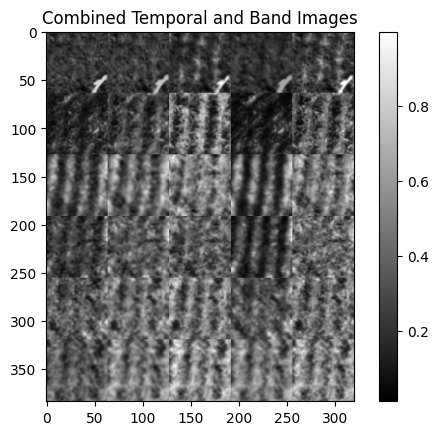

In [53]:
import matplotlib.pyplot as plt

# 对每个时间点的波段图像进行横向拼接
time_combined_images = []
for t in range(temporal_data.shape[0]):
    time_images = temporal_data[t]
    # 沿着水平方向拼接
    combined_image = np.hstack(time_images)
    time_combined_images.append(combined_image)

# 将不同时间点的拼接图像纵向排列
final_image = np.vstack(time_combined_images)

# 可视化最终的二维图像
plt.imshow(final_image, cmap='gray')
plt.title('Combined Temporal and Band Images')
plt.colorbar()
plt.show()

In [54]:
# 更新 profile 以适应新图像的尺寸
profile.update(
    width=final_image.shape[1],
    height=final_image.shape[0],
    count=1,  # 因为是单波段图像
    dtype=final_image.dtype
)

# 保存为 tif 文件
output_path = 'combined_image.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(final_image, 1)

print(f"图像已保存为 {output_path}")

图像已保存为 combined_image.tif


d:\software\tool_code\anaconda3\envs\qgis\Lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [ ]:
def merge_temporal_patches(file_lists, input_dir, output_dir):
    """
    将时序多光谱patches合并为一个多维数组并保存
    file_lists: 包含多个时间点的文件列表
    input_dir: 输入文件目录
    output_dir: 输出文件目录
    """
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # 读取第一个文件获取基本信息
    first_file = input_dir / file_lists[0][0]
    with rasterio.open(first_file) as src:
        height = src.height
        width = src.width
        profile = src.profile.copy()
    
    # 创建一个四维数组来存储所有数据 [T, B, H, W]
    # T: 时间点数量, B: 波段数量, H: 高度, W: 宽度
    temporal_data = np.zeros((len(file_lists), len(file_lists[0]), height, width), 
                           dtype=np.float32)
    
    # 读取所有文件
    for t, time_files in enumerate(file_lists):
        for b, file_name in enumerate(time_files):
            file_path = input_dir / file_name
            with rasterio.open(file_path) as src:
                temporal_data[t, b] = src.read(1)
    
    # 更新profile用于保存
    profile.update({
        'count': len(file_lists) * len(file_lists[0]),  # 总波段数 = 时间点数 × 每个时间点的波段数
        'dtype': 'float32'
    })
    
    # 构建输出文件名
    # 从第一个文件名中提取plot_id和patch_num
    parts = file_lists[0][0].split('_')
    name_parts = parts[0].split('-')
    plot_id = name_parts[4]
    patch_num = parts[1].replace('.tif', '')
    output_name = f"temporal_merged_{plot_id}_{patch_num}.tif"
    output_path = output_dir / output_name
    
    # 保存合并后的数据
    # 重塑数组为 [T*B, H, W] 格式以符合GDAL要求
    reshaped_data = temporal_data.reshape(-1, height, width)
    
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(reshaped_data)
    
    return output_path

# 使用示例
input_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches"
output_dir = r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_merged"

# 假设merge_list是之前生成的文件列表
for sequence_list in merge_list:
    try:
        output_path = merge_temporal_patches(sequence_list, input_dir, output_dir)
        print(f"成功合并并保存到: {output_path}")
    except Exception as e:
        print(f"处理时发生错误: {e}")